In [3]:
import pandas as pd


# Merge: unimos dataframes por columnas en común
## Fase 4: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.

# Idea clave antes de empezar

Education está en CLH (clientes)

Flights Booked está en CFA (actividad)

Hay relación 1 cliente → muchos vuelos

NO se puede analizar esto sin unir los datasets primero.

In [4]:
df_clh = pd.read_csv("./files/CLH.csv")
df_clh

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [5]:
df_cfa = pd.read_csv("./files/CFA.csv")
df_cfa

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [6]:
df_merged = df_cfa.merge(
    df_clh[['Loyalty Number', 'Education']],
    on='Loyalty Number',
    how='inner'
)

In [7]:
df_merged.shape

(405624, 11)

In [8]:
df_merged

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Education
0,100018,2017,1,3,0,3,1521,152.0,0,0,Bachelor
1,100102,2017,1,10,4,14,2030,203.0,0,0,College
2,100140,2017,1,6,0,6,1200,120.0,0,0,College
3,100214,2017,1,0,0,0,0,0.0,0,0,Bachelor
4,100272,2017,1,0,0,0,0,0.0,0,0,Bachelor
...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,College
405620,999911,2018,12,0,0,0,0,0.0,0,0,Doctor
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Bachelor
405622,999982,2018,12,0,0,0,0,0.0,0,0,College


In [9]:
df_merged.duplicated().sum()
#Los registros duplicados tras el merge corresponden a múltiples observaciones de actividad de vuelos para un mismo 
# cliente, lo cual es consistente con la estructura longitudinal del conjunto de datos y no representa un error en la integración.

np.int64(1864)

In [10]:
df_merged[df_merged.duplicated()].head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Education
42,101902,2017,1,0,0,0,0,0.0,0,0,College
227,112142,2017,1,0,0,0,0,0.0,0,0,Bachelor
478,126100,2017,1,0,0,0,0,0.0,0,0,Master
567,130331,2017,1,0,0,0,0,0.0,0,0,Bachelor
660,135421,2017,1,0,0,0,0,0.0,0,0,Bachelor


In [11]:
df_analysis = df_merged[['Loyalty Number', 'Flights Booked', 'Education']]
df_analysis.head()

,Loyalty Number,Flights Booked,Education
0,100018,3,Bachelor
1,100102,10,College
2,100140,6,College
3,100214,0,Bachelor
4,100272,0,Bachelor


In [12]:
df_analysis.shape

(405624, 3)

In [13]:
df_analysis.to_csv("./files/data_para_fase_4.csv")

In [14]:
df_a = df_analysis
df_a.set_index(['Loyalty Number'], inplace = True)
df_a.head()

,Flights Booked,Education
Loyalty Number,,
100018,3,Bachelor
100102,10,College
100140,6,College
100214,0,Bachelor
100272,0,Bachelor


In [15]:
df_a.to_csv("./files/data_para_fase_4.csv")

In [16]:
df_a.isnull().sum()

Flights Booked    0
Education         0
dtype: int64

In [17]:
df_a.describe()

,Flights Booked
count,405624.000000
mean,4.115052
std,5.225518
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,21.000000


In [18]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
Flights Booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0


In [19]:
stats_education = (
    df_a
    .groupby('Education')['Flights Booked']
    .agg(['count', 'mean', 'std'])
    .reset_index()
)


In [20]:
stats_education

,Education,count,mean,std
0,Bachelor,253752,4.091093,5.216995
1,College,102672,4.153012,5.242136
2,Doctor,17856,4.146281,5.250093
3,High School or Below,19008,4.155777,5.234551
4,Master,12336,4.184014,5.210294


In [21]:
df_a.isnull().sum()

Flights Booked    0
Education         0
dtype: int64

In [22]:
df_a.tail()

,Flights Booked,Education
Loyalty Number,,
999902,0,College
999911,0,Doctor
999940,3,Bachelor
999982,0,College
999986,0,Bachelor


In [23]:
df_a.reset_index(inplace=True)


In [24]:
df_a

,Loyalty Number,Flights Booked,Education
0,100018,3,Bachelor
1,100102,10,College
2,100140,6,College
3,100214,0,Bachelor
4,100272,0,Bachelor
...,...,...,...
405619,999902,0,College
405620,999911,0,Doctor
405621,999940,3,Bachelor
405622,999982,0,College


In [25]:
df_a[['Loyalty Number','Flights Booked','Education']].isna().sum()


Loyalty Number    0
Flights Booked    0
Education         0
dtype: int64

In [26]:
df_a.to_csv("./files/data_para_fase_4.csv")

In [27]:
## PREPARAR LOS DATOS

df_analysis = df_merged[['Flights Booked', 'Education']]


In [30]:
## ANALISIS DESCRIPTIVO
stats_por_educacion = (
    df_analysis
    .groupby('Education')['Flights Booked']
    .agg(
        Promedio_Vuelos_Reservados='mean',
        Desviacion_Estandar_Vuelos='std',
        Total_Registros='count'
    )
    .reset_index()
)



In [31]:
stats_por_educacion


,Education,Promedio_Vuelos_Reservados,Desviacion_Estandar_Vuelos,Total_Registros
0,Bachelor,4.091093,5.216995,253752
1,College,4.153012,5.242136,102672
2,Doctor,4.146281,5.250093,17856
3,High School or Below,4.155777,5.234551,19008
4,Master,4.184014,5.210294,12336


In [32]:
stats_por_educacion.describe()


,Promedio_Vuelos_Reservados,Desviacion_Estandar_Vuelos,Total_Registros
count,5.000000,5.000000,5.000000
mean,4.146035,5.230814,81124.800000
std,0.033929,0.016777,103510.589928
min,4.091093,5.210294,12336.000000
25%,4.146281,5.216995,17856.000000
50%,4.153012,5.234551,19008.000000
75%,4.155777,5.242136,102672.000000
max,4.184014,5.250093,253752.000000


Vemos que los promedios de vuelos reservados son muy similares entre todos los niveles educativos (alrededor de 4.1–4.18), lo que sugiere que **el nivel de educación no influye significativamente** en la cantidad de vuelos reservados. Las desviaciones estándar también son parecidas (5.2), indicando una **variabilidad similar** en el comportamiento de reserva entre los grupos. Las diferencias observadas son mínimas, por lo que no se aprecia una relación clara entre educación y número de vuelos reservados.


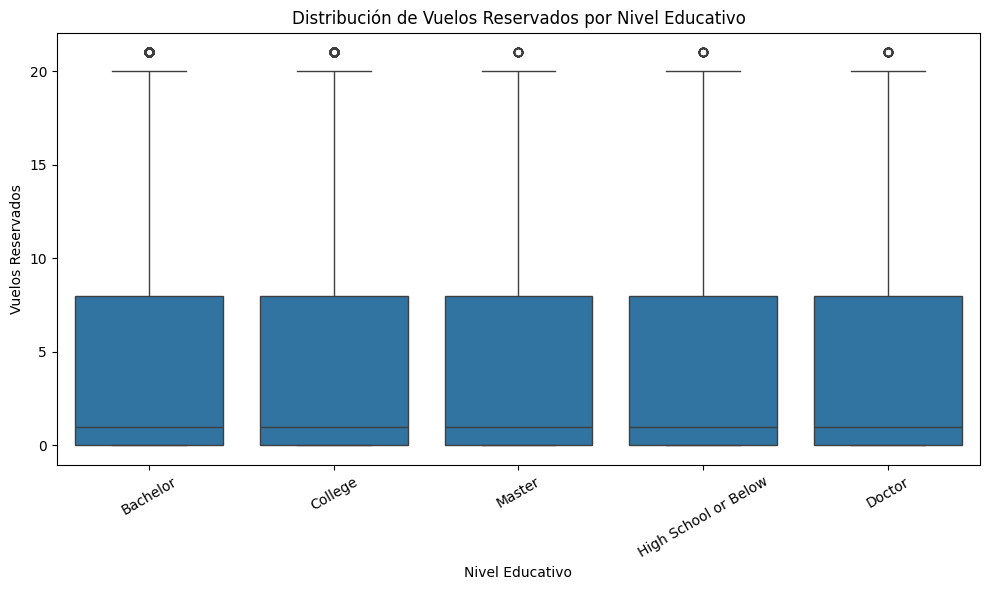

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_analysis,
    x='Education',
    y='Flights Booked'
)

plt.title('Distribución de Vuelos Reservados por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Vuelos Reservados')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<BarContainer object of 5 artists>

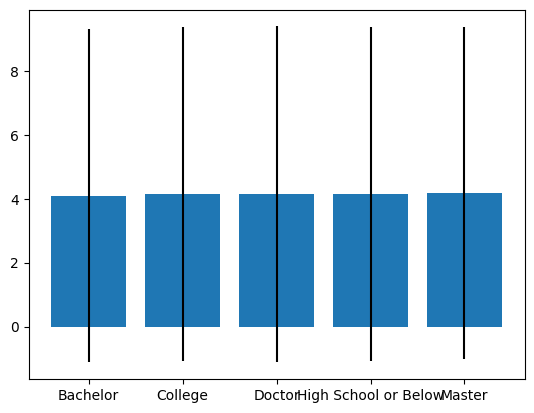

In [39]:
plt.bar(
    stats_por_educacion['Education'],
    stats_por_educacion['Promedio_Vuelos_Reservados'],
    yerr=stats_por_educacion['Desviacion_Estandar_Vuelos']
)

